In [1]:
#labeled datasets 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#default theme
plt.style.use('ggplot')
sns.color_palette("tab10")
sns.set(context='notebook', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[20,8]
matplotlib.rcParams.update({'font.size': 15})

In [3]:
#Read the data
df=pd.read_csv(r'C:\\Users\\SAMSUNG\\OneDrive\\Desktop\\fake_or_real_news.csv', encoding='latin1')

#Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [28]:
target=df.label.value_counts()
target

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_24348\1761507763.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df.label, palette = ['orange', 'blue'])


Text(0.5, 1.0, 'Fake & Real News')

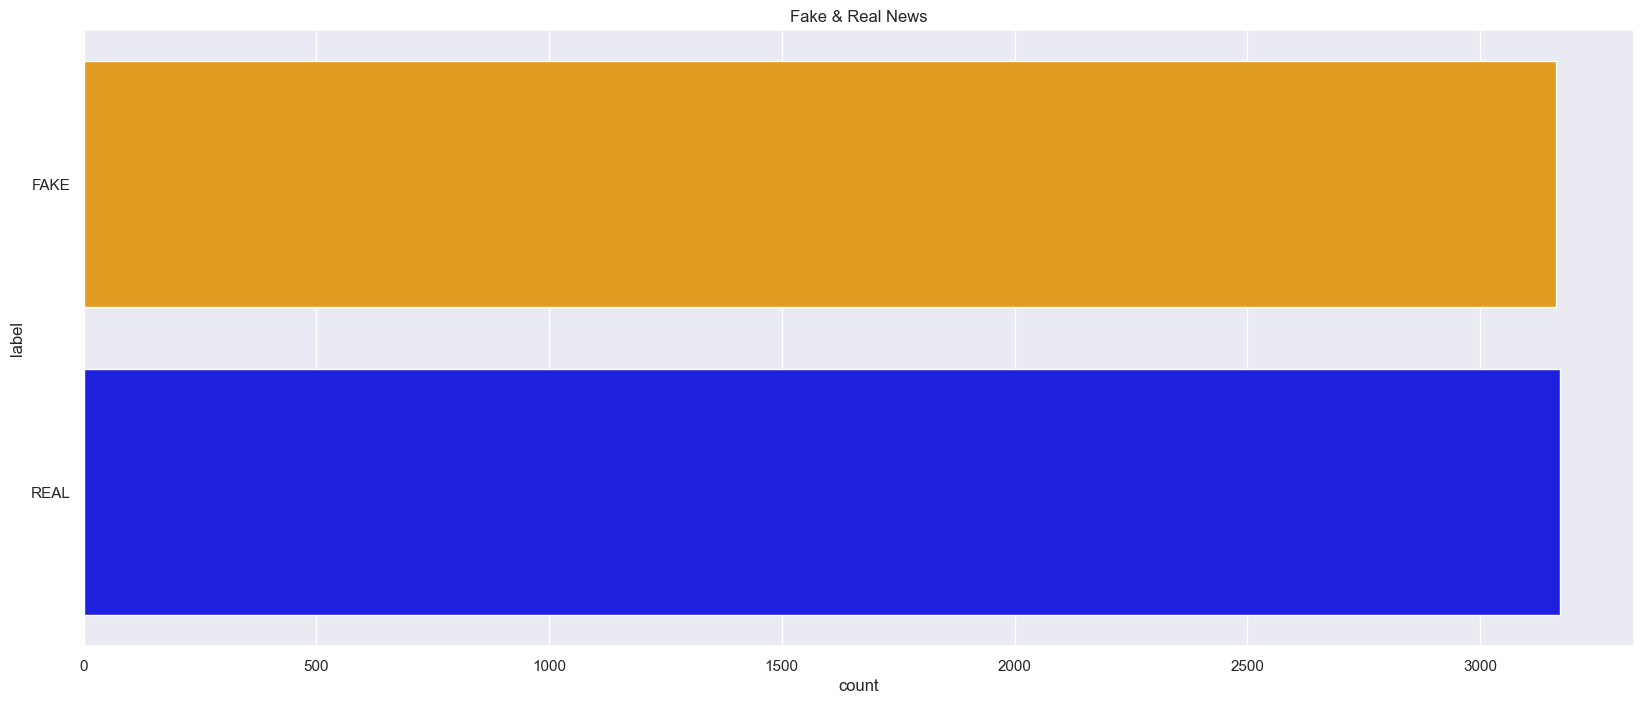

In [5]:
sns.countplot(data = df.label, palette = ['orange', 'blue'])
plt.title('Fake & Real News')

In [6]:
#Split the dataset into testing and training data
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [7]:
#initialize and implement TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#initialize and implement a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train. 
# Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
#93% accuracy of fake/real news 

Accuracy: 93.13%


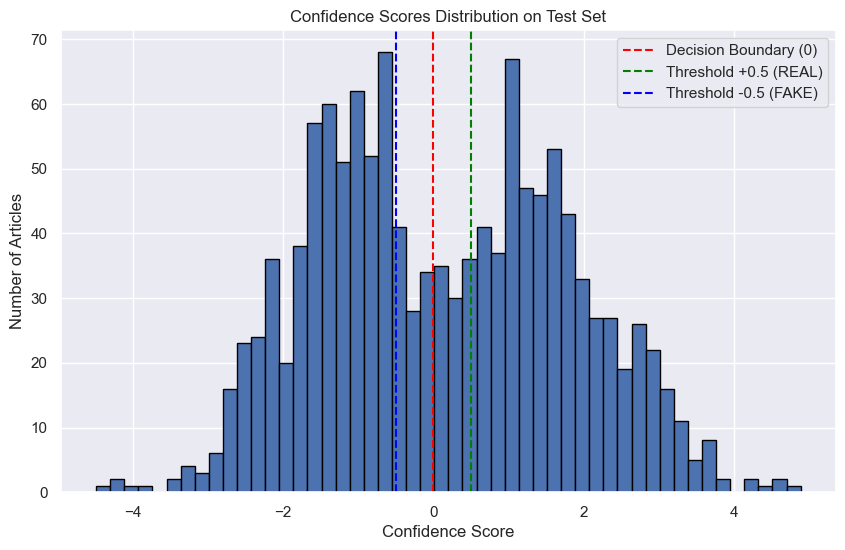

In [26]:
import matplotlib.pyplot as plt

# Get the decision function scores for the test set
test_scores = pac.decision_function(tfidf_test)

# Plot the distribution
plt.figure(figsize=(10,6))
plt.hist(test_scores, bins=50, edgecolor='black')

# Add decision boundary at 0
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')

# Optional: thresholds at 0.5 and -0.5 if you want
plt.axvline(x=0.5, color='green', linestyle='--', label='Threshold +0.5 (REAL)')
plt.axvline(x=-0.5, color='blue', linestyle='--', label='Threshold -0.5 (FAKE)')

plt.title('Confidence Scores Distribution on Test Set')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

# Turn it into a nice table
cm_df = pd.DataFrame(cm, 
                     index=['Actual FAKE', 'Actual REAL'], 
                     columns=['Predicted FAKE', 'Predicted REAL'])

print(cm_df)


             Predicted FAKE  Predicted REAL
Actual FAKE             590              48
Actual REAL              39             590


In [10]:
#unlabeled unsupervised learning

import pandas as pd

new_df = pd.read_csv("C:\\Users\\SAMSUNG\\OneDrive\\Desktop\\BBC News Test.csv") 

# Preview the first few entries
print(new_df.shape)
print(new_df.head())


(735, 2)
   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...


In [13]:
import joblib
joblib.dump(pac, 'fake_news_model.pkl')

# Save the fitted tfidf_vectorizer too
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [14]:
X_new = tfidf_vectorizer.transform(new_df['Text'])

# shape of the transformed features
print(X_new.shape)

(735, 69450)


In [ ]:
import joblib
pac_model = joblib.load("fake_news_model.pkl")  

# Use the trained classifier to predict labels for the new articles
predictions = pac_model.predict(X_new)



['FAKE' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL' 'FAKE' 'FAKE']


In [16]:
new_df['predicted_label'] = predictions

# Preview the DataFrame with the new column
new_df.head()

,ArticleId,Text,predicted_label
0,1018,qpr keeper day heads for preston queens park r...,FAKE
1,1319,software watching while you work software that...,REAL
2,1138,d arcy injury adds to ireland woe gordon d arc...,FAKE
3,459,india s reliance family feud heats up the ongo...,FAKE
4,1020,boro suffer morrison injury blow middlesbrough...,FAKE


In [17]:
new_df.to_csv("new_news_with_predictions.csv", index=False)

# For example, count the predictions
print(new_df['predicted_label'].value_counts())

predicted_label
FAKE    520
REAL    215
Name: count, dtype: int64


In [ ]:
#confidence
pac_model.decision_function(X_new)

array([-0.25869561,  0.00932965, -0.24761264, -0.92475667, -0.47680199,
        0.26970033,  0.40958371,  0.26681202, -0.93015659, -0.19996284,
        0.76708918, -0.92060018,  0.70919778, -0.46345707, -0.28680237,
        0.00885526, -0.67726892, -0.96647178, -0.59228397, -0.47521575,
        0.99199962,  0.0039141 , -0.46941339,  0.70385022, -0.07968711,
       -0.56495519, -0.07509818, -0.31248027, -0.62186776, -0.21016098,
       -0.56412545, -0.09518328,  0.69368774, -0.65326747, -0.12180227,
       -0.45757598, -1.04844187,  0.30352206, -1.35464398, -0.32571393,
        0.62956811, -0.07546622, -1.01884999, -0.1721714 , -0.89594558,
       -0.66877514, -0.47010025,  0.27632233, -0.08952141, -0.51095238,
        0.07153254, -0.14998166,  0.57840102, -0.91294133, -0.40215881,
        0.34217733, -0.19764912, -0.71889215, -0.25778884, -0.51317301,
       -0.37558429,  0.14763848, -1.01899659,  0.48498517, -0.55305512,
       -0.27414616, -0.55159352, -0.22747945, -0.60799477, -0.45

In [ ]:
import numpy as np

def custom_predict(scores, threshold=0.5):
    predictions = []
    for score in scores:
        if score < -threshold:
            predictions.append('FAKE')
        elif score > threshold:
            predictions.append('REAL')
        else:
            predictions.append('UNCERTAIN')
    return np.array(predictions)

# Get confidence scores
scores = pac_model.decision_function(X_new)

# Apply custom threshold
predictions_custom = custom_predict(scores, threshold=0.5)



['UNCERTAIN' 'UNCERTAIN' 'UNCERTAIN' 'FAKE' 'UNCERTAIN' 'UNCERTAIN'
 'UNCERTAIN' 'UNCERTAIN' 'FAKE' 'UNCERTAIN']


In [21]:
new_df['predicted_label_custom'] = predictions_custom
new_df.to_csv('news with threshold_predictions.csv', index=False)

In [25]:
prediction_counts = pd.Series(predictions_custom).value_counts()
print(prediction_counts)

UNCERTAIN    417
FAKE         250
REAL          68
Name: count, dtype: int64


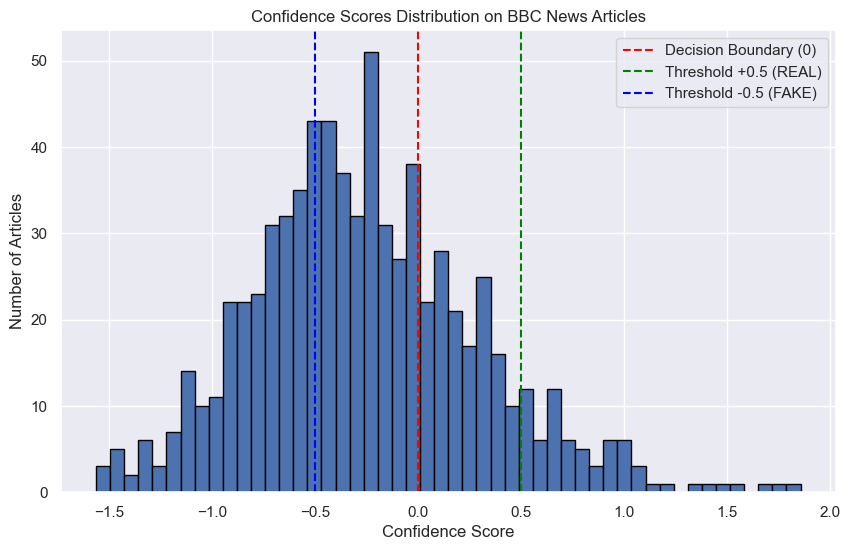

In [23]:
scores = pac_model.decision_function(X_new)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plot histogram of scores
plt.hist(scores, bins=50, edgecolor='black')

# Add a vertical line at 0 (decision boundary)
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')

# Optional: Show thresholds
plt.axvline(x=0.5, color='green', linestyle='--', label='Threshold +0.5 (REAL)')
plt.axvline(x=-0.5, color='blue', linestyle='--', label='Threshold -0.5 (FAKE)')

plt.title('Confidence Scores Distribution on BBC News Articles')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()
